In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

**Read the file**

In [2]:
data = pd.read_csv("Housing.csv")

**collect some information about the data**

*   info
*   describe
*   shape







In [5]:
data.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [10]:
data.shape

(545, 13)

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**check every column info in a dataframe**

In [11]:
pd.DataFrame(data.dtypes , columns= ["Dtype"]).T

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
Dtype,int64,int64,int64,int64,int64,object,object,object,object,object,int64,object,object


In [12]:
data.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


**Remove an important stuff**

*   hence everything is important I won`t remove anything

---



**correct the Date Types**

In [14]:
data[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea" ,"furnishingstatus"]]=data[["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea" ,"furnishingstatus"]].astype("category")

In [16]:
data.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


In [15]:
pd.DataFrame(data.dtypes , columns= ["Dtype"]).T

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
Dtype,int64,int64,int64,int64,int64,category,category,category,category,category,int64,category,category


**Move my target to the last**
*   which the price is our main goal I`ll move it to the last

In [17]:
columns = data.columns.tolist()
columns.append(columns.pop(columns.index("price")))
data = data[columns] #don`t forget to save it in the main data

In [18]:
data.head(1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000


**Null values**
> to deal with null values we should to find it first







In [19]:
pd.DataFrame({"Dtype": data.dtypes , "Num_of_uniq" : data.nunique() ,
              "Null_Values" : data.isnull().sum() , "Null_Ratio" : data.isnull().sum() / data.shape[0]}).T

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
Dtype,int64,int64,int64,int64,category,category,category,category,category,int64,category,category,int64
Num_of_uniq,284,6,4,4,2,2,2,2,2,4,2,3,219
Null_Values,0,0,0,0,0,0,0,0,0,0,0,0,0
Null_Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




```
No Null values
```



**Dublicates check**

In [21]:
data.duplicated().sum()

0



```
No duplicates
```



**Check for Outliers**

In [25]:
data.select_dtypes("number").columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'], dtype='object')

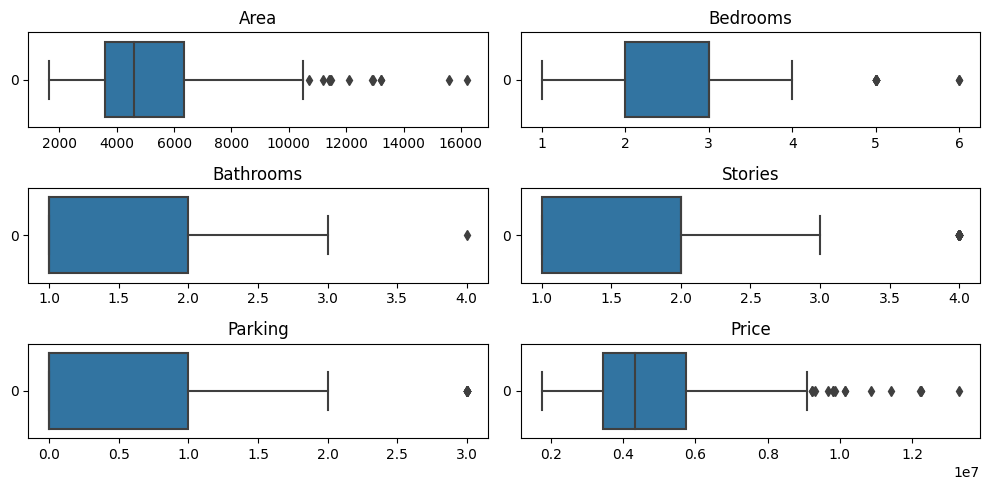

In [44]:
fig, axs = plt.subplots(3,2, figsize = (10,5))
sns.boxplot(data=data['area'], ax=axs[0, 0], orient="h")
axs[0, 0].set_title("Area")

sns.boxplot(data=data['bedrooms'], ax=axs[0, 1], orient="h")
axs[0, 1].set_title("Bedrooms")

sns.boxplot(data=data['bathrooms'], ax=axs[1, 0], orient="h")
axs[1, 0].set_title("Bathrooms")

sns.boxplot(data=data['stories'], ax=axs[1, 1], orient="h")
axs[1, 1].set_title("Stories")

sns.boxplot(data=data['parking'], ax=axs[2, 0], orient="h")
axs[2, 0].set_title("Parking")

sns.boxplot(data=data['price'], ax=axs[2, 1], orient="h")
axs[2, 1].set_title("Price")
plt.tight_layout()


**Find Uppers and Lowers**

In [48]:
for column in data.select_dtypes("number").columns:
  Q1 = np.quantile(data[column] , 0.25)
  Q3 = np.quantile(data[column] , 0.75)
  IQR = Q3 - Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR
  print(column , upper , lower)
  print()


area 10500.0 -540.0

bedrooms 4.5 0.5

bathrooms 3.5 -0.5

stories 3.5 -0.5

parking 2.5 -1.5

price 9205000.0 -35000.0



**You`ll see that there is numbers in ( - ) and that`s wrong**
**it should be edited by the IQR equation**

In [50]:
numerical_cols = data.select_dtypes("number").columns
for col in numerical_cols:
    Q1 = np.quantile(data[col], .25)
    Q3 = np.quantile(data[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outlier_values = data[data[col] > upper][col].values
    lower_outlier_values = data[data[col] < lower][col].values
    data[col] = data[col].replace(upper_outlier_values, upper)
    data[col] = data[col].replace(lower_outlier_values, lower)

    print(f"Lower bound of Column {col} = {lower}")
    print(f"Upper bound of Column {col} = {upper}")
    print(data[col].min())
    print(data[col].max())
    print()


Lower bound of Column area = -540.0
Upper bound of Column area = 10500.0
1650
10500

Lower bound of Column bedrooms = 0.5
Upper bound of Column bedrooms = 4.5
1.0
4.5

Lower bound of Column bathrooms = -0.5
Upper bound of Column bathrooms = 3.5
1.0
3.5

Lower bound of Column stories = -0.5
Upper bound of Column stories = 3.5
1.0
3.5

Lower bound of Column parking = -1.5
Upper bound of Column parking = 2.5
0.0
2.5

Lower bound of Column price = -35000.0
Upper bound of Column price = 9205000.0
1750000
9205000



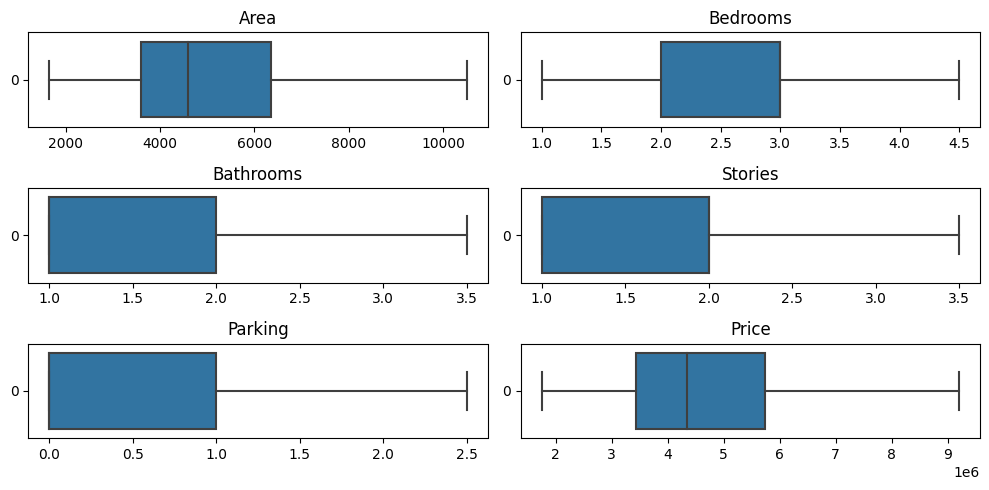

In [51]:
fig, axs = plt.subplots(3,2, figsize = (10,5))
sns.boxplot(data=data['area'], ax=axs[0, 0], orient="h")
axs[0, 0].set_title("Area")

sns.boxplot(data=data['bedrooms'], ax=axs[0, 1], orient="h")
axs[0, 1].set_title("Bedrooms")

sns.boxplot(data=data['bathrooms'], ax=axs[1, 0], orient="h")
axs[1, 0].set_title("Bathrooms")

sns.boxplot(data=data['stories'], ax=axs[1, 1], orient="h")
axs[1, 1].set_title("Stories")

sns.boxplot(data=data['parking'], ax=axs[2, 0], orient="h")
axs[2, 0].set_title("Parking")

sns.boxplot(data=data['price'], ax=axs[2, 1], orient="h")
axs[2, 1].set_title("Price")
plt.tight_layout()



```
Outliers had been replaced with upper and lower bounds successfuly
```



**Encoding**

In [55]:
pd.DataFrame(data.select_dtypes("category").nunique()).T

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,2,2,2,2,2,2,3


i will label encode

```
mainroad	guestroom	basement	hotwaterheating	airconditioning	prefarea
```



In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.mainroad = le.fit_transform(data.mainroad)
data.guestroom = le.fit_transform(data.guestroom)
data.basement = le.fit_transform(data.basement)
data.hotwaterheating = le.fit_transform(data.hotwaterheating)
data.airconditioning = le.fit_transform(data.airconditioning)
data.prefarea = le.fit_transform(data.prefarea)

In [59]:
data.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,furnished,9205000
1,8960,4.0,3.5,3.5,1,0,0,0,1,2.5,0,furnished,9205000
2,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,semi-furnished,9205000
3,7500,4.0,2.0,2.0,1,0,1,0,1,2.5,1,furnished,9205000
4,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,furnished,9205000


and I will one hotted encode

```
furnishingstatus
```



In [69]:
data = pd.get_dummies(data, columns=["furnishingstatus"])
data.head()

KeyError: ignored

In [70]:
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,9205000,1,0,0
1,8960,4.0,3.5,3.5,1,0,0,0,1,2.5,0,9205000,1,0,0
2,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,9205000,0,1,0
3,7500,4.0,2.0,2.0,1,0,1,0,1,2.5,1,9205000,1,0,0
4,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,9205000,1,0,0


**Normalization**

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes("number").columns
scaler.fit(data[numerical_cols])
data[numerical_cols] = scaler.transform(data[numerical_cols])
data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.651977,0.857143,0.4,0.8,1.0,0.0,0.0,0.0,1.0,0.8,1.0,1.00000,1.0,0.0,0.0
1,0.825989,0.857143,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.00000,1.0,0.0,0.0
2,0.938983,0.571429,0.4,0.4,1.0,0.0,1.0,0.0,0.0,0.8,1.0,1.00000,0.0,1.0,0.0
3,0.661017,0.857143,0.4,0.4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.00000,1.0,0.0,0.0
4,0.651977,0.857143,0.0,0.4,1.0,1.0,1.0,0.0,1.0,0.8,0.0,1.00000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.152542,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,0.0,0.00939,0.0,0.0,1.0
541,0.084746,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00230,0.0,1.0,0.0
542,0.222599,0.285714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0
543,0.142373,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,1.0,0.0,0.0
